In [1]:
import os

os.chdir('/Users/edwardchiu/Desktop/projects/baha-anime-analysis')
os.getcwd()

'/Users/edwardchiu/Desktop/projects/baha-anime-analysis'

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [17]:
scalar = StandardScaler()

In [18]:
df_all_anime = pd.read_csv('data/all_anime.csv')
df_all_anime.head()

,name,thumbnail,total_view,total_episode,avg_view,link,score,score_count,score_rate,first_launched_date,author,director,agent,animator,types,intro
0,青之壬生浪,https://p2.bahamut.com.tw/B/ACG/c/23/000013552...,43000.0,5,8600.000000,https://ani.gamer.com.tw/animeRef.php?sn=113677,4.7,356.0,0.008279,2024-10-19,安田剛士,羽原久美子,曼迪,MAHO FILM,"['青春', '勵志', '歷史']",本作品以約160年前的幕末京都為舞台，描繪新選組的青春物語。因黑船來襲而動亂頻繁的幕末京都裡...
1,香蕉喵遊世界,https://p2.bahamut.com.tw/B/ACG/c/00/000014150...,23000.0,8,2875.000000,https://ani.gamer.com.tw/animeRef.php?sn=113633,4.6,147.0,0.006391,2024-10-14,Q-LiA,矢立恭,Ani-One,TMS Entertainment（第6工作室）×Lesprit,"['溫馨', '悠閒', '泡麵番', '闔家觀賞']",在某座星球上，誕生了一隻不可思議的生物。牠的名字叫「香蕉喵」，是藏在香蕉裡的神秘小貓咪，沒有...
2,平凡職業造就世界最強 第三季,https://p2.bahamut.com.tw/B/ACG/c/96/000012709...,616000.0,6,102666.666667,https://ani.gamer.com.tw/animeRef.php?sn=113635,4.9,4397.0,0.007138,2024-10-14,白米良,岩永彰,木棉花,asread.,"['動作', '冒險', '奇幻', '異世界', '魔法']",南雲始一行人打敗了神之使徒「諾因」，並順利擊退侵略王都的魔人族。在攻略剩餘的兩個大迷宮前，為...
3,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,https://p2.bahamut.com.tw/B/ACG/c/12/000013861...,1028000.0,6,171333.333333,https://ani.gamer.com.tw/animeRef.php?sn=113665,5.0,7238.0,0.007041,2024-10-13,硬梨菜、不二涼介,窪岡俊之、池下博紀,木棉花,C2C,"['動作', '冒險', '奇幻']",「你是為了什麼而玩遊戲的？」\r如果世界上的遊戲有100款神作，那麼也就有存在著1000款糞...
4,魔王 2099,https://p2.bahamut.com.tw/B/ACG/c/43/000013124...,538000.0,6,89666.666667,https://ani.gamer.com.tw/animeRef.php?sn=113662,4.9,4578.0,0.008509,2024-10-13,紫大悟,安藤良,木棉花,J.C.STAFF,"['動作', '奇幻', '魔法', '科幻', '職場']",這裡是統合曆2099年──新宿市。在被滅亡的500年後，傳說中的魔王「貝爾托爾」再次降臨於發...


In [113]:
df = df_all_anime.dropna(subset='score_rate', ignore_index=True)
df['weight'] = df['total_episode'] / df['total_episode'].sum()

/var/folders/0d/b1lxqvt94r7dnl9q4nxqz6tw0000gn/T/ipykernel_44420/828993953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['total_episode'] / df['total_episode'].sum()


In [136]:
df['total_episode'].corr(df['score_rate'])

np.float64(-0.19822529996234894)

In [137]:
y = df['score_rate']
X = df['total_episode']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             score_rate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     69.33
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.70e-16
Time:                        16:07:20   Log-Likelihood:                 5837.6
No. Observations:                1697   AIC:                        -1.167e+04
Df Residuals:                    1695   BIC:                        -1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0070      0.000     33.372

In [86]:
df_sample = df.sample(n=50, random_state=25)

In [87]:
df_sample.head()

,name,thumbnail,total_view,total_episode,avg_view,link,score,score_count,score_rate,first_launched_date,author,director,agent,animator,types,intro
370,飆速宅男 第五季,https://p2.bahamut.com.tw/B/ACG/c/36/000012093...,260000.0,25,10400.000000,https://ani.gamer.com.tw/animeRef.php?sn=113272,4.7,292.0,0.001123,2022-10-09,渡邊航,鍋島修,曼迪,TMS Entertainment,"['校園', '勵志', '運動']",有一名御宅族的總北高中新生「小野田坂道」熱愛動漫、遊戲和秋葉原，原本打算高中後一定要加入動漫...
595,叫我對大哥 (TV版),https://p2.bahamut.com.tw/B/ACG/c/11/000011601...,222000.0,12,18500.000000,https://ani.gamer.com.tw/animeRef.php?sn=112739,4.8,638.0,0.002874,2021-07-03,おぷうのきょうだい,青木純,木棉花,Fanworks、SPACE NEKO COMPANY,"['喜劇', '悠閒', '泡麵番', '闔家觀賞']",以 おぷうのきょうだい所著漫畫為原著改編的動畫《老子是、津島（暫譯，俺、つしま）》，描述一位...
69,靠廢柴技能【狀態異常】成為最強的我將蹂躪一切,https://p2.bahamut.com.tw/B/ACG/c/92/000013749...,2839000.0,12,236583.333333,https://ani.gamer.com.tw/animeRef.php?sn=113569,4.3,8945.0,0.003151,2024-07-05,篠崎芳,福田道生,木棉花,Seven Arcs、SynergySP,"['冒險', '奇幻', '異世界', '魔法', '黑暗']",在學校裡就如同空氣般毫無存在感的高中生「三森燈河」，與同班同學一起被視為勇者召喚到了異世界。...
977,魔法禁書目錄 Ⅲ,https://p2.bahamut.com.tw/B/ACG/c/69/000009186...,2726000.0,26,104846.153846,https://ani.gamer.com.tw/animeRef.php?sn=91869,3.9,2424.0,0.000889,2018-10-05,鎌池和馬,錦織博,木棉花,J.C.STAFF,"['冒險', '奇幻', '魔法', '超能力', '科幻', '校園']",科學世界存在著超能力，宗教的世界存在著魔法。一邊是擁有超先進科技、充滿著機械的學園都市，另一...
1336,斬！赤紅之瞳,https://p2.bahamut.com.tw/B/ACG/c/03/000006720...,2883000.0,24,120125.000000,https://ani.gamer.com.tw/animeRef.php?sn=67203,4.7,3991.0,0.001384,2014-07-06,タカヒロ(原作)、田代哲也(作畫),小林智樹,Ani-One,WHITE FOX,"['動作', '冒險', '奇幻', '血腥暴力']",介紹\r 《斬！赤紅之瞳（アカメが斬る!）》是タカヒロ（原作）及田代哲也（作畫）在「月刊G...


In [88]:
y = df_sample['score_rate']
X = df_sample[['total_episode']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             score_rate   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     24.39
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           9.94e-06
Time:                        15:02:40   Log-Likelihood:                 206.09
No. Observations:                  50   AIC:                            -408.2
Df Residuals:                      48   BIC:                            -404.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0092      0.001      9.372

In [85]:
model.pvalues

const            2.026904e-12
total_episode    9.940411e-06
dtype: float64

In [118]:
parameters = []
pvalues = []
corr_coeffs = []
for i in range(100):
    df_sample = df.sample(n=100, weights='weight', random_state=i)
    y = df_sample['score_rate']
    X = df_sample[['total_episode']]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    parameters.append(model.params[1])
    pvalues.append(model.pvalues[1])
    corr_coeffs.append(np.sqrt(model.rsquared) * np.sign(model.params[1]))

/var/folders/0d/b1lxqvt94r7dnl9q4nxqz6tw0000gn/T/ipykernel_44420/1439609836.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  parameters.append(model.params[1])
/var/folders/0d/b1lxqvt94r7dnl9q4nxqz6tw0000gn/T/ipykernel_44420/1439609836.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalues.append(model.pvalues[1])
/var/folders/0d/b1lxqvt94r7dnl9q4nxqz6tw0000gn/T/ipykernel_44420/1439609836.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [119]:
len(corr_coeffs)

100

In [120]:
import matplotlib.pyplot as plt

In [121]:
df_plot = pd.DataFrame({'parameter': parameters,
                        'pvalue': pvalues,
                        'corr_coeff': corr_coeffs})

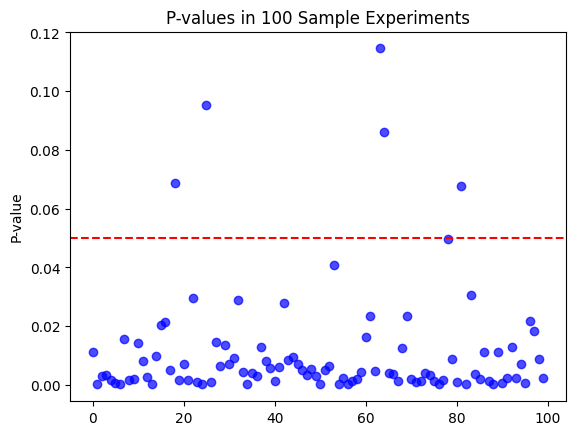

In [128]:
# Create the scatter plot
plt.scatter(df_plot.index, df_plot['pvalue'], color='blue', alpha=0.7, label='p-values')

# Add a horizontal line at p=0.05
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')

# Add title and labels
plt.title('P-values in 100 Sample Experiments')
# plt.xlabel('Experiment Index')
plt.ylabel('P-value')

# Save the plot as a .jpg file
plt.savefig('plots/pvalues_experiment.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

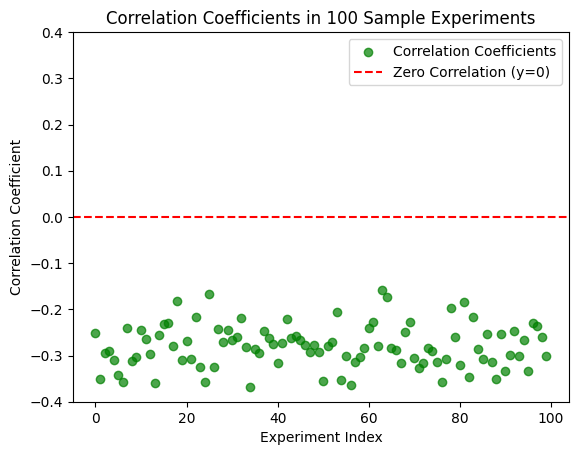

In [130]:
# Create the scatter plot for correlation coefficients
plt.scatter(df_plot.index, df_plot['corr_coeff'], color='green', alpha=0.7, label='Correlation Coefficients')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--', label='Zero Correlation (y=0)')

# Set the y-axis range
plt.ylim([-0.4, 0.4])

# Add title and labels
plt.title('Correlation Coefficients in 100 Sample Experiments')
plt.xlabel('Experiment Index')
plt.ylabel('Correlation Coefficient')

# Add legend
plt.legend()

# Save the plot as a .jpg file
# plt.savefig('corr_coeff_experiment.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

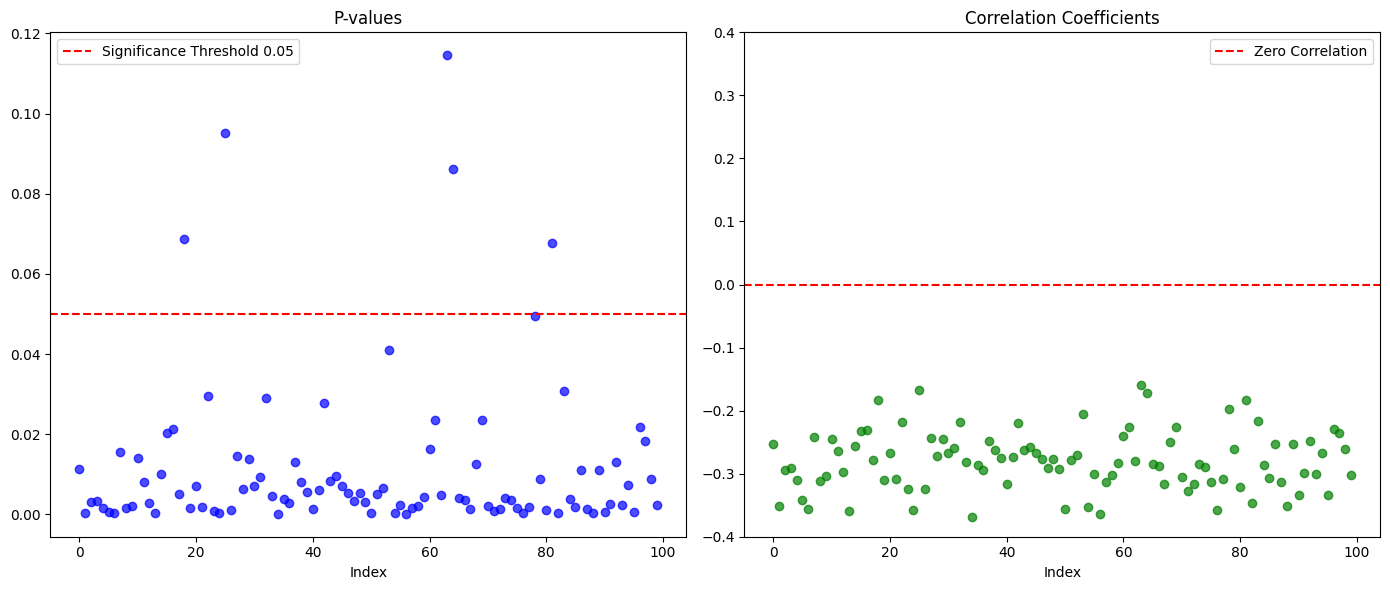

In [134]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the p-values on the left
axes[0].scatter(df_plot.index, df_plot['pvalue'], color='blue', alpha=0.7)
axes[0].axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold 0.05')
axes[0].set_title('P-values')
axes[0].set_xlabel('Index')
# axes[0].set_ylabel('P-value')
axes[0].legend()

# Plot the correlation coefficients on the right
axes[1].scatter(df_plot.index, df_plot['corr_coeff'], color='green', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', label='Zero Correlation')
axes[1].set_ylim([-0.4, 0.4])
axes[1].set_title('Correlation Coefficients')
axes[1].set_xlabel('Index')
# axes[1].set_ylabel('Correlation Coefficient')
axes[1].legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a .jpg file
plt.savefig('plots/ep_count_to_score_rate_experiment.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()